In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install --quiet transformers==4.1.1
!pip install --quiet tokenizers==0.9.4
!pip install --quiet sentencepiece==0.1.94
!pip install --quiet tqdm==4.56.0
!pip install --quiet pytorch-lightning==1.2.10

     |████████████████████████████████| 1.5 MB 3.8 MB/s 
     |████████████████████████████████| 895 kB 39.6 MB/s 
     |████████████████████████████████| 2.9 MB 36.1 MB/s 
     |████████████████████████████████| 1.1 MB 4.3 MB/s 
     |████████████████████████████████| 72 kB 699 kB/s 
     |████████████████████████████████| 841 kB 4.3 MB/s 
     |████████████████████████████████| 176 kB 34.6 MB/s 
     |████████████████████████████████| 132 kB 52.1 MB/s 
     |████████████████████████████████| 596 kB 41.2 MB/s 
     |████████████████████████████████| 829 kB 42.4 MB/s 
     |████████████████████████████████| 1.1 MB 39.1 MB/s 
     |████████████████████████████████| 160 kB 48.3 MB/s 
     |████████████████████████████████| 192 kB 52.9 MB/s 
     |████████████████████████████████| 271 kB 52.2 MB/s 


In [ ]:
# Restart runtime

In [1]:
%cd /content/drive/My Drive/Text Mining TDDE16/

/content/drive/My Drive/Text Mining TDDE16


In [2]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import pytorch_lightning as pl
import argparse


from transformers import (
    AdamW,
    get_linear_schedule_with_warmup
)

pl.seed_everything(42)

Global seed set to 42


42

In [3]:
from transformers import BartTokenizer, BartForConditionalGeneration
tokenizer = BartTokenizer.from_pretrained('facebook/bart-base')
model = BartForConditionalGeneration.from_pretrained('facebook/bart-base')

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.69k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/558M [00:00<?, ?B/s]

In [4]:
x = 'context: Democratic Party candidates were consistently'+ ' [SEP] ' +'answer: the federation'
y = 'question: What court in South Africa has authority over?'

In [5]:
inputs = tokenizer.encode_plus(x, truncation=False, max_length=128, pad_to_max_length=True, return_tensors="pt")
targets = tokenizer.encode_plus(y, truncation=False, max_length=64, pad_to_max_length=True, return_tensors="pt")

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2179: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [6]:
inputs

{'input_ids': tensor([[    0, 46796,    35,  1557,  1643,  2261,    58,  6566,   646,  3388,
           510,   742,  1948,    35,     5, 15666,     2,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,  

In [7]:
targets

{'input_ids': tensor([[    0, 40018,    35,   653,   461,    11,   391,  1327,    34,  3446,
            81,   116,     2,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])}

In [8]:
model(inputs['input_ids'], inputs['attention_mask'], targets['input_ids'], targets['attention_mask'])[0].shape

torch.Size([1, 64, 50265])

In [9]:
train_file_path = 'dataset/squad_train.csv'
validation_file_path = 'dataset/squad_val.csv'
train_df = pd.read_csv(train_file_path, nrows=1000)

In [10]:
train_df.head()

,context,answer,question
0,Beyoncé's lighter skin color and costuming has...,L'Oréal,Which company was accused of coloring Beyonce'...
1,Democratic Party candidates were consistently ...,120,About how many people died during the Draft Ri...
2,"In South Africa, a ""two apex"" system existed f...",the Constitutional Court,What court in South Africa has authority over ...
3,The University of Notre Dame has made being a ...,40%,What percentage of the food served at Notre Da...
4,Federalism is one of the entrenched constituti...,the federation,"In Germany, foreign affairs is under the exclu..."


In [11]:
from tqdm.notebook import tqdm
import copy

class QuestionGenerationDataset(Dataset):
    def __init__(self, tokenizer, filepath, max_len_inp=512, max_len_out=96):
        self.path = filepath

        self.passage_column = "context"
        self.answer = "answer"
        self.question = "question"

        # self.data = pd.read_csv(self.path)
        self.data = pd.read_csv(self.path,nrows=1000)

        self.max_len_input = max_len_inp
        self.max_len_output = max_len_out
        self.tokenizer = tokenizer
        self.inputs = []
        self.targets = []

        self._build()

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, index):
        source_ids = self.inputs[index]["input_ids"].squeeze()
        target_ids = self.targets[index]["input_ids"].squeeze()

        src_mask = self.inputs[index]["attention_mask"].squeeze()  # might need to squeeze
        target_mask = self.targets[index]["attention_mask"].squeeze()  # might need to squeeze

        labels = copy.deepcopy(target_ids)
        labels [labels==0] = -100

        return {"source_ids": source_ids, "source_mask": src_mask, "target_ids": target_ids, "target_mask": target_mask,"labels":labels}

    def _build(self):
        for idx in tqdm(range(len(self.data))):
            passage,answer,target = self.data.loc[idx, self.passage_column],self.data.loc[idx, self.answer], self.data.loc[idx, self.question]

            input_ = "context: %s  answer: %s </s>" % (passage, answer)
            target = "question: %s </s>" % (str(target))

            # get encoding length of input. If it is greater than self.max_len skip it
            test_input_encoding = self.tokenizer.encode_plus(input_, truncation=False, return_tensors="pt")

            test_target_encoding = self.tokenizer.encode_plus(target, truncation=False, return_tensors="pt")
            
            length_of_input_encoding = len(test_input_encoding['input_ids'][0])

            length_of_target_encoding = len(test_target_encoding['input_ids'][0])


            if length_of_input_encoding > self.max_len_input or length_of_target_encoding > self.max_len_output:
              continue

            # tokenize inputs
            tokenized_inputs = self.tokenizer.batch_encode_plus(
                [input_], max_length=self.max_len_input, pad_to_max_length=True, return_tensors="pt"
            )
            # tokenize targets
            tokenized_targets = self.tokenizer.batch_encode_plus(
                [target], max_length=self.max_len_output, pad_to_max_length=True,return_tensors="pt"
            )

            self.inputs.append(tokenized_inputs)
            self.targets.append(tokenized_targets)


In [12]:
train_file_path = 'dataset/squad_train.csv'
validation_file_path = 'dataset/squad_val.csv'

In [13]:
train_dataset = QuestionGenerationDataset(tokenizer, train_file_path)


  0%|          | 0/1000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2179: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [14]:
validation_dataset = QuestionGenerationDataset(tokenizer, validation_file_path)


  0%|          | 0/1000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2179: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [15]:
class BartFineTuner(pl.LightningModule):
    def __init__(self,hparams, model, tokenizer):
        super(BartFineTuner, self).__init__()
        self.hparams = hparams
        self.model = model
        self.tokenizer = tokenizer


    def forward( self, input_ids, attention_mask=None, decoder_input_ids=None, decoder_attention_mask=None, lm_labels=None):
         outputs = self.model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            decoder_attention_mask=decoder_attention_mask,
            labels=lm_labels
        )
         
         return outputs


    def training_step(self, batch, batch_idx):
        outputs = self.forward(
            input_ids=batch["source_ids"],
            attention_mask=batch["source_mask"],
            decoder_input_ids = batch["target_ids"],
            decoder_attention_mask=batch['target_mask'],
            lm_labels=batch['labels']
        )

        loss = outputs[0]
        self.log('train_loss',loss)
        return loss

    def validation_step(self, batch, batch_idx):
        outputs = self.forward(
            input_ids=batch["source_ids"],
            attention_mask=batch["source_mask"],
            decoder_input_ids = batch["target_ids"],
            decoder_attention_mask=batch['target_mask'],
            lm_labels=batch['labels']
        )

        loss = outputs[0]
        self.log("val_loss",loss)
        return loss

    def train_dataloader(self):
        return DataLoader(train_dataset, batch_size=self.hparams.batch_size,num_workers=4)

    def val_dataloader(self):
        return DataLoader(validation_dataset, batch_size=self.hparams.batch_size,num_workers=4)



    def configure_optimizers(self):
        optimizer = AdamW(self.parameters(), lr=3e-4, eps=1e-8)
        return optimizer


In [16]:
# import torch.nn as nn
# import torch.nn.functional as F
# import random
# import torch.optim as optim

In [17]:
# optimizer = optim.Adam(model.parameters())
# criterion = nn.CrossEntropyLoss()

In [18]:
# for batch in DataLoader(train_dataset, batch_size=4):
#   print(batch)
#   break

In [19]:
# for epoch in range(1):
    
#     model.train()
#     loss = 0
#     i = 0

#     for batch in DataLoader(train_dataset, batch_size=2):

#         if batch['target_ids'].shape[0] != 4:
#           break

#         optimizer.zero_grad()
        
#         outputs = model(input_ids= batch["source_ids"], 
#                         attention_mask= batch["source_mask"], 
#                         decoder_input_ids = batch["target_ids"],
#                         decoder_attention_mask= batch['target_mask'])
        

#         output = outputs.last_hidden_state

#         output_dim = output.shape[-1]
        
#         output = output.view(-1, output_dim)

#         target = batch['target_ids'].view(-1)

#         loss = criterion(output, target)

#         loss.backward()

#         optimizer.step()

#         print('Loss: ', loss.item())

In [20]:
args_dict = dict(
    batch_size=4,
)

args = argparse.Namespace(**args_dict)


bartmodel = BartFineTuner(args, model, tokenizer)

trainer = pl.Trainer(max_epochs = 1, gpus=1, progress_bar_refresh_rate=30)

trainer.fit(bartmodel)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type                         | Params
-------------------------------------------------------
0 | model | BartForConditionalGeneration | 139 M 
-------------------------------------------------------
139 M     Trainable params
0         Non-trainable params
139 M     Total params
557.682   Total estimated model params size (MB)
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

1

In [21]:
print ("Saving model")
save_path_model = '/content/drive/My Drive/Text Mining TDDE16/Bart/model/'
save_path_tokenizer = '/content/drive/My Drive/Text Mining TDDE16/Bart/tokenizer/'

bartmodel.model.save_pretrained(save_path_model)
tokenizer.save_pretrained(save_path_tokenizer)

Saving model


('/content/drive/My Drive/Text Mining TDDE16/Bart/tokenizer/tokenizer_config.json',
 '/content/drive/My Drive/Text Mining TDDE16/Bart/tokenizer/special_tokens_map.json',
 '/content/drive/My Drive/Text Mining TDDE16/Bart/tokenizer/vocab.json',
 '/content/drive/My Drive/Text Mining TDDE16/Bart/tokenizer/merges.txt',
 '/content/drive/My Drive/Text Mining TDDE16/Bart/tokenizer/added_tokens.json')

In [22]:
trained_model_path = '/content/drive/My Drive/Text Mining TDDE16/Bart/model/'
trained_tokenizer = '/content/drive/My Drive/Text Mining TDDE16/Bart/tokenizer/'

In [23]:
model = BartForConditionalGeneration.from_pretrained(trained_model_path)
tokenizer = BartTokenizer.from_pretrained(trained_tokenizer)

In [24]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print ("device ",device)

model = model.to(device)

device  cuda


In [25]:
context = "Joe Biden Trump said and predicted that some states would reopen this month."
answer = "Joe Biden"
text = "context: "+context + " " + "answer: " + answer + " </s>"
print (text)

context: Joe Biden Trump said and predicted that some states would reopen this month. answer: Joe Biden </s>


In [26]:
encoding = tokenizer.encode_plus(text, max_length =512, padding=True, return_tensors="pt")

input_ids, attention_mask  = encoding["input_ids"].to(device), encoding["attention_mask"].to(device)

In [27]:
context = train_df.iloc[8]['context']
answer = train_df.iloc[8]['answer']
ques = train_df.iloc[8]['question']
text = "context: "+context + " " + "answer: " + answer + " </s>"
print (text)

context: The Mass of Paul VI was also in Latin but approval was given for the use of vernacular languages. There had been other instructions issued by the Pope in 1964, 1967, 1968, 1969 and 1970 which centered on the reform of all liturgies of the Roman Church. These major reforms were not welcomed by all and in all countries. The sudden apparent "outlawing" of the 400-year-old Mass, the last typical edition of which being promulgated only a few years earlier in 1962 by Paul's predecessor, Pope John XXIII, was not always explained well. Further experimentation with the new Mass by liturgists, such as the usage of pop/folk music (as opposed to the Gregorian Chant advocated by Pope Pius X), along with concurrent changes in the order of sanctuaries, was viewed by some as vandalism. In 2007, Pope Benedict XVI clarified that the 1962 Mass of John XXIII and the 1970 Mass of Paul VI are two forms of the same Roman Rite, the first, which had never been "juridically abrogated", now being an "ex

In [28]:
encoding = tokenizer.encode_plus(text, max_length =512, padding=True, return_tensors="pt")

input_ids, attention_mask  = encoding["input_ids"].to(device), encoding["attention_mask"].to(device)

In [29]:
model.eval()

beam_outputs = model.generate(
    input_ids=input_ids, 
    attention_mask=attention_mask,
    max_length=72,
    early_stopping=True,
    num_beams=5,
    num_return_sequences=3
)

for beam_output in beam_outputs:
    sent = tokenizer.decode(beam_output, skip_special_tokens=True, clean_up_tokenization_spaces=True)
    print (sent)

/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1065: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  next_indices = next_tokens // vocab_size


questionquestion: What was the name of the Mass of Paul VI? 
questionquestion: What was the name of the Mass of Rome? 
questionquestion: What was the name of the Mass? 


In [30]:
def generate_question(i):

  context = test_df.iloc[i]['context']
  answer = test_df.iloc[i]['answer']
  text = "context: "+ context + " " + "answer: " + answer + " </s>"

  encoding = tokenizer.encode_plus(text, max_length =512, padding=True, return_tensors="pt")

  input_ids, attention_mask  = encoding["input_ids"].to(device), encoding["attention_mask"].to(device)

  beam_outputs = model.generate(
      input_ids=input_ids, attention_mask=attention_mask,
      max_length=72,
      early_stopping=True,
      num_beams=5,
      num_return_sequences=3)

  sent = tokenizer.decode(beam_outputs[0], skip_special_tokens=True, clean_up_tokenization_spaces=True)
  return sent

In [31]:
test_df = pd.read_csv('dataset/squad_test.csv', nrows=1000)
test_df.shape

(1000, 3)

In [32]:
test_pred = [generate_question(i) for i in range(len(test_df))]

/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1065: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  next_indices = next_tokens // vocab_size


In [33]:
import re

In [43]:
test_pred_new = []
for t in test_pred:
  r = re.search('questionquestion:(.*)', t)
  test_pred_new.append(r.group(1).strip())

In [45]:
acc = 0
for i in range(len(test_df)):
  if test_df.iloc[i]['question'].lower() == test_pred_new[i].lower():
    acc += 1

print('Exact Match:', acc/len(test_df))

Exact Match: 0.0


In [58]:
precision = []
recall = []
f1 = []

for i in range(len(test_df)):
  gold = set(test_df.iloc[i]['question'].lower().split())
  pred = set(test_pred_new[i].lower().split())

  if len(pred) == 0:
    continue

  p = len(gold & pred)/len(pred)
  precision.append(p)
  rc = len(gold & pred)/len(gold)
  recall.append(rc)

  if p + rc == 0:
    f1.append(0.0)
    continue
  f1.append(2 * (p * rc) / (p + rc))

print('Precision score: ', sum(precision)/len(test_df))
print('Recall score: ', sum(recall)/len(test_df))
print('F1 Score: ', sum(f1)/len(test_df))

Precision score:  0.2939987956487948
Recall score:  0.21261702173628463
F1 Score:  0.23950769038948821


In [47]:
test_df.head()

,context,answer,question
0,Guinea-Bissau was once part of the kingdom of ...,political instability,Guinea-Bissau has a history of what since inde...
1,The quarter-wave elements imitate a series-res...,lossless,What could be the best possible output versus ...
2,New York City's commuter rail network is the l...,Manhattan,In what borough is Pennsylvania Station located?
3,"The end of a treaty, the eschatocol (or closin...",equally authentic,What is the nature of the different versions o...
4,The modern petroleum industry started in 1846 ...,Bóbrka,Where was the first Rock Oil mine built?


In [38]:
from transformers import BertTokenizer, BertForQuestionAnswering

btokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bmodel = BertForQuestionAnswering.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForQuestionAnswering: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-base-uncased a

In [48]:
def answer_question(question, answer_text):

    input_ids = btokenizer.encode(question, answer_text)

    sep_index = input_ids.index(btokenizer.sep_token_id)

    num_seg_a = sep_index + 1

    num_seg_b = len(input_ids) - num_seg_a

    segment_ids = [0]*num_seg_a + [1]*num_seg_b

    assert len(segment_ids) == len(input_ids)

    outputs = bmodel(torch.tensor([input_ids]), token_type_ids=torch.tensor([segment_ids]))

    start_scores = outputs.start_logits
    end_scores = outputs.end_logits
    
    answer_start = torch.argmax(start_scores)
    answer_end = torch.argmax(end_scores)

    tokens = btokenizer.convert_ids_to_tokens(input_ids)

    answer = tokens[answer_start]

    for i in range(answer_start + 1, answer_end + 1):
        if tokens[i][0:2] == '##':
            answer += tokens[i][2:]
        else:
            answer += ' ' + tokens[i]

    return 'Answer: "' + answer + '"'

In [49]:
question, text = test_df.iloc[8]['question'], test_df.iloc[8]['context']
print(answer_question(question, text))

question, text = test_pred_new[8], test_df.iloc[8]['context']
print(answer_question(question, text))

Answer: "growth"
Answer: "growth and it gained market share from competitors even during industry slumps . during the same period , rival pc vendors such as compaq , gateway , ibm , packard bell , and ast research struggled and eventually left the market or were bought out . dell surpassed compaq to become the largest pc manufacturer in 1999 . operating costs made up only 10 percent of dell ' s $ 35 billion in revenue in 2002 , compared with 21 percent of revenue at hewlett - packard , 25 percent at gateway , and 46 percent at cisco . in 2002 , when compaq merged with hewlett packard ( the fourth - place pc maker"


In [50]:
acc = []

for i in range(len(test_df)):
  q1, t = test_df.iloc[i]['question'], test_df.iloc[i]['context']
  q2 = test_pred_new[i]

  if len(t) > 2000:
    continue
  if answer_question(q1, t) == answer_question(q2, t):
    acc.append(1)
  else:
    acc.append(0)

print('SPS score: ', sum(acc) / len(acc))

SPS score:  0.3947633434038268


In [51]:
!pip install --quiet sentence_transformers

     |████████████████████████████████| 78 kB 3.0 MB/s 
     |████████████████████████████████| 3.4 MB 25.1 MB/s 
     |████████████████████████████████| 6.8 MB 33.7 MB/s 
     |████████████████████████████████| 61 kB 458 kB/s 
     |████████████████████████████████| 3.3 MB 33.7 MB/s 


In [52]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [53]:
from sklearn.metrics.pairwise import cosine_similarity

In [54]:
xsim = list(range(1, 1001))
sim = []
for i in range(1000):
  sen_embeddings = model.encode([test_df['question'][i], test_pred_new[i]])
  sim.append(cosine_similarity([sen_embeddings[0]], sen_embeddings[1:])[0][0])

print('SBERT similarity score: ', sum(sim)/len(sim))

SBERT similarity score:  0.5588612200617791


In [55]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'SBERT Similarity')

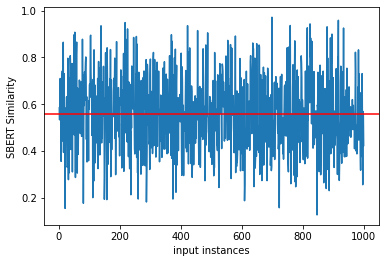

In [56]:
plt.plot(xsim, sim)
plt.axhline(y=sum(sim)/len(sim), color='r', linestyle='-')
plt.xlabel("input instances")
plt.ylabel("SBERT Similarity")